# Chương 4. HỌC MÁY

## Mô hình Support Vector Machine

Ý tưởng của thuật toán Support Vector Machine (SVM) khi đi tìm một siêu phẳng (hyperplane) để phân chia lớp dữ liệu sao cho khoảng cách từ siêu phẳng đến các điểm gần nhất của mỗi lớp là lớn nhất, khoảng cách này được gọi là khoảng cách lề (margin). Thuật toán SVM được áp dụng rộng rãi trong các bài toán phân lớp và hồi quy. Các điểm dữ liệu nằm gần siêu phẳng và xác định biên của margin được gọi là véc-tơ hỗ trợ, và chính chúng là yếu tố quyết định trong việc xác định vị trí của siêu phẳng tối ưu. 

Để cho đơn giản ta xét bài toán trên không gian hai chiều. Gọi tập dữ liệu huấn luyện bao gồm $n$ điểm $(X_i, y_i)$ trong đó $X_i \in \mathbb{R}^D$ và $y_i \in \{-1, +1\}$ là nhãn của bộ dữ liệu cần dự đoán. Gọi $H$ là mặt phẳng ngăn cách các điểm $X_i$ và phương trình tổng quát có dạng:

\begin{equation}
w_1x + w_2y + c = 0 
\end{equation}

Với $w = \begin{bmatrix}
w_1 \\
w_2
\end{bmatrix}$ là tham số cần xác định. 

<p align="center">
  <img src="picture/SVM_distance.drawio.png" width="600">
  <br>
  <em>Hình 1. Khoảng cách từ một support vector bất kỳ trong không gian tọa độ hai chiều đến siêu phẳng H.</em>
</p>


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Đọc dữ liệu
col = pd.read_csv(r'data/College.csv')

# 2. Tiền xử lý
col = col[['Top10perc', 'PhD', 'Terminal', 'perc.alumni', 'Grad.Rate',
           'Top25perc', 'S.F.Ratio', 'Private', 'Expend']]
col['Private'] = col['Private'].map({'Yes': 1, 'No': 0})

# 3. Tách biến độc lập và phụ thuộc
X = col.drop(columns=['Private'])
y = col['Private']

# 4. Chia tập train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 6. Huấn luyện mô hình SVM đơn giản (kernel mặc định = 'rbf')
svm_model = SVC()
svm_model.fit(X_train, y_train)

# 7. Dự đoán và đánh giá
y_pred = svm_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy (Độ chính xác):", acc)

Accuracy (Độ chính xác): 0.8333333333333334


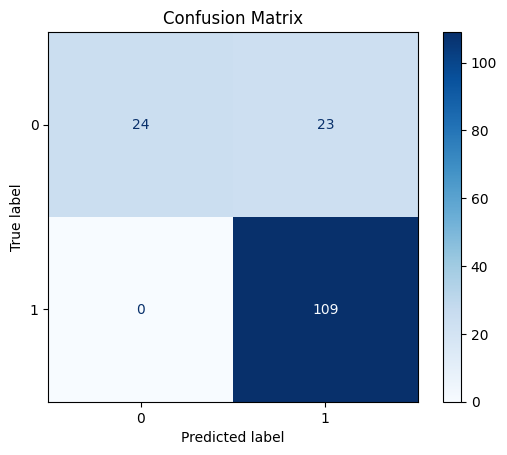

In [18]:
# 1️⃣ Tạo ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)
# 3️⃣ Vẽ ma trận trực quan
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

## Mô hình Kernel SVM

Như đã trình bày, thuật toán SVM được xây đựng với mục tiêu tìm một siêu phẳng để ngăn cách các lớp trong dữ liệu. Tuy nhiên với ý tưởng này sẽ gặp vấn để khi bộ dữ liệu không có mối quan hệ tuyến tính với nhau. Do đó SVM đơn thuần trở nên không hiệu quả. Để khắc phục vấn đề này, ta sẽ sử dụng một ánh xạ để chuyển không gian dữ liệu ban đầu sang một không gian đặc trưng có số chiều cao hơn, sao cho các điểm trong không gian mới  có thể được phân tách bằng một quan hệ tuyến tính. Kỹ thuật này được gọi là ánh xạ đặc trưng \footnote{Feature mapping} được định nghĩa bằng khái niệm toán học như sau:

\begin{equation}
\phi : \mathbb{R}^n \rightarrow \mathbb{R}^m, \quad \text{với } m > n
\end{equation}

Trong đó:
- $\phi(x)$: là hàm ánh xạ đặc trưng,
- $x$: véc-tơ đầu vào ban đầu,
- $\phi(x)$: véc-tơ mới trong không gian đặc trưng.

<p align="center">
  <img src="picture/Kernel_PCA.png" width="600">
  <br>
  <em>Hình 2. Bộ dữ liệu trên không gian 2 chiều {X, Y} và thuộc hai lớp khác nhau có mối quan hệ phi tuyến được biến đổi sang không gian 3 chiều có mối quan hệ tuyến tính.</em>
</p>

In [17]:
# Chọn kernel: 'poly' 
kernel = 'poly' 
params = {}

if kernel == 'rbf':
    # RBF: điều chỉnh C và gamma
    params = dict(C=1.0, gamma='scale')
elif kernel == 'poly':
    # Polynomial: degree, coef0, C
    params = dict(C=1.0, degree=3, gamma='scale', coef0=0.0)
elif kernel == 'sigmoid':
    # Sigmoid: coef0 quan trọng
    params = dict(C=1.0, gamma='scale', coef0=0.0)

svm_model = SVC(kernel=kernel, **params, random_state=42)
svm_model.fit(X_train, y_train)

# 7. Dự đoán & đánh giá
y_pred = svm_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Kernel: {kernel} | Accuracy: {acc:.4f}")

Kernel: poly | Accuracy: 0.8526


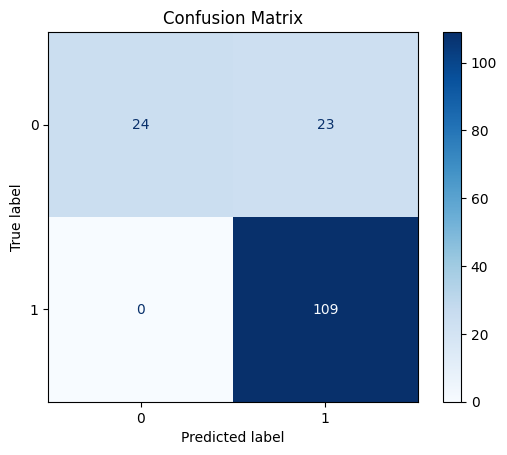

In [16]:
# 1️⃣ Tạo ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)
# 3️⃣ Vẽ ma trận trực quan
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()